In [3]:
import pandas as pd
import numpy as np
import os as os
import aux.acessos as ac
import pickle

In [1]:
# safras = ['2017', '2018', '2019', '2020', '2021', '2022']

# pers = pd.DataFrame()
# for i in safras:
#      query = "select * from customer_sandbox_zone.flavia_analise_timespan_agg " + '\n'
#      query = query + "where substring(ds_safra, 1, 4) = '" 
#      query = query + i + "'"
#      print(query)
#      temp_pers = ac.df_athena_q('flavia-costa', query)
#      pers = pers.append(temp_pers)

# pers.to_pickle('personas_picke.pkl')

In [4]:
df = pd.read_csv("/home/flavia.costa/work/eletro/lifetime-clusters.csv", sep = ';')

In [10]:
df['credito_S1'].nlargest(5)

38     8.0
64     8.0
111    8.0
126    8.0
135    8.0
Name: credito_S1, dtype: float64

<AxesSubplot:>

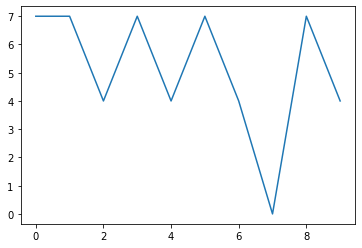

In [6]:
df[:10]['credito_S1'].plot()

In [3]:
df.head()

,conta_cartao,credito_S1,debito_S1,cartao_S1,conta_S1,credito_S2,debito_S2,cartao_S2,conta_S2,credito_S3,debito_S3,cartao_S3,conta_S3,credito_S4,debito_S4,cartao_S4,conta_S4
0,3676909,7.0,1.0,4.0,6.0,4.0,1.0,0.0,0.0,7.0,2.0,6.0,6.0,2.0,2.0,7.0,0.0
1,3676918,7.0,1.0,4.0,6.0,0.0,1.0,0.0,3.0,3.0,2.0,6.0,1.0,NaN,NaN,NaN,NaN
2,3676920,4.0,1.0,4.0,8.0,3.0,1.0,0.0,7.0,3.0,2.0,6.0,7.0,2.0,2.0,7.0,4.0
3,3676934,7.0,4.0,6.0,6.0,0.0,0.0,2.0,3.0,6.0,1.0,1.0,8.0,2.0,2.0,7.0,4.0
4,3676937,4.0,1.0,6.0,6.0,3.0,1.0,0.0,6.0,1.0,2.0,6.0,0.0,2.0,2.0,7.0,0.0


In [27]:
df['cartao_S1'].isnull().value_counts()

False    1324472
True      318780
Name: cartao_S1, dtype: int64

In [28]:
df['cartao_S2'].isnull().value_counts()

False    1210412
True      432840
Name: cartao_S2, dtype: int64

In [29]:
df['cartao_S3'].isnull().value_counts()

False    959443
True     683809
Name: cartao_S3, dtype: int64

In [30]:
df['cartao_S4'].isnull().value_counts()

True     909588
False    733664
Name: cartao_S4, dtype: int64

In [31]:
df['conta_S1'].isnull().value_counts()

False    1324472
True      318780
Name: conta_S1, dtype: int64

In [32]:
df['conta_S2'].isnull().value_counts()

False    1210412
True      432840
Name: conta_S2, dtype: int64

In [33]:
df['conta_S3'].isnull().value_counts()

False    959443
True     683809
Name: conta_S3, dtype: int64

In [34]:
df['conta_S4'].isnull().value_counts()

True     909588
False    733664
Name: conta_S4, dtype: int64

In [16]:
df['credito_S1'].isnull().value_counts()

False    1324472
True      318780
Name: credito_S1, dtype: int64

In [17]:
df['credito_S2'].isnull().value_counts()

False    1210412
True      432840
Name: credito_S2, dtype: int64

In [18]:
df['credito_S3'].isnull().value_counts()

False    959443
True     683809
Name: credito_S3, dtype: int64

In [19]:
df['credito_S4'].isnull().value_counts()

True     909588
False    733664
Name: credito_S4, dtype: int64

In [20]:
df['debito_S1'].isnull().value_counts()

False    1324472
True      318780
Name: debito_S1, dtype: int64

In [24]:
df['debito_S2'].isnull().value_counts()

False    1210412
True      432840
Name: debito_S2, dtype: int64

In [25]:
df['debito_S3'].isnull().value_counts()

False    959443
True     683809
Name: debito_S3, dtype: int64

In [26]:
df['debito_S4'].isnull().value_counts()

True     909588
False    733664
Name: debito_S4, dtype: int64

In [50]:


len(df['debito_S3'].unique())

10

In [51]:
df['debito_S1'].value_counts()

1.0    1013148
2.0     180595
4.0      62354
3.0      42215
0.0      12853
5.0       6728
6.0       6579
Name: debito_S1, dtype: int64

In [62]:
df.query('debito_S1 == 1')[:42000]

,conta_cartao,credito_S1,debito_S1,cartao_S1,conta_S1,credito_S2,debito_S2,cartao_S2,conta_S2,credito_S3,debito_S3,cartao_S3,conta_S3,credito_S4,debito_S4,cartao_S4,conta_S4
0,3676909,7.0,1.0,4.0,6.0,4.0,1.0,0.0,0.0,7.0,2.0,6.0,6.0,2.0,2.0,7.0,0.0
1,3676918,7.0,1.0,4.0,6.0,0.0,1.0,0.0,3.0,3.0,2.0,6.0,1.0,NaN,NaN,NaN,NaN
2,3676920,4.0,1.0,4.0,8.0,3.0,1.0,0.0,7.0,3.0,2.0,6.0,7.0,2.0,2.0,7.0,4.0
4,3676937,4.0,1.0,6.0,6.0,3.0,1.0,0.0,6.0,1.0,2.0,6.0,0.0,2.0,2.0,7.0,0.0
5,3676944,7.0,1.0,4.0,0.0,1.0,1.0,0.0,6.0,7.0,8.0,6.0,6.0,2.0,6.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45815,3888074,4.0,1.0,4.0,8.0,6.0,1.0,0.0,3.0,7.0,2.0,6.0,6.0,6.0,2.0,0.0,0.0
45816,3888075,8.0,1.0,4.0,3.0,0.0,1.0,0.0,2.0,7.0,2.0,6.0,7.0,0.0,2.0,7.0,7.0
45817,3888077,0.0,1.0,4.0,1.0,6.0,1.0,2.0,5.0,2.0,2.0,6.0,0.0,7.0,2.0,3.0,2.0
45818,3888079,7.0,1.0,4.0,4.0,4.0,1.0,9.0,6.0,5.0,2.0,6.0,3.0,6.0,2.0,7.0,5.0


In [10]:
pd.pivot_table(df[['credito_S1', 'credito_S2', 'conta_cartao']], index = 'credito_S1', columns = 'credito_S2', values = 'conta_cartao' , aggfunc='count')

credito_S2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
credito_S1,,,,,,,,,,
0.0,2413,4823,2326,10622,2628,1761,1568,2995,3628,1362
1.0,1132,1734,845,4481,1202,657,722,882,2381,699
2.0,4671,11040,1470,23996,6213,3199,4084,1468,4637,2430
3.0,7360,12182,8954,26861,7627,4261,3679,12315,12372,3734
4.0,8651,17081,5198,38509,10262,5765,6580,5817,10320,4797
5.0,7872,14932,4588,32922,9135,5517,5879,5907,9442,4431
6.0,1052,1661,1045,3598,1067,587,559,1289,1925,595
7.0,36394,84043,24932,188426,44220,28813,28822,32924,48535,20704
8.0,2379,5412,535,11422,3052,1610,2051,699,1722,1175


In [11]:
pd.pivot_table(df[['conta_S1', 'conta_S2', 'conta_cartao']], index = 'conta_S1', columns = 'conta_S2', values = 'conta_cartao' , aggfunc='count')

conta_S2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
conta_S1,,,,,,,,,
0.0,16517,18100,20201,18464,24176,11062,87627,14370,29864
1.0,3831,3584,5130,4243,4401,2693,18182,2952,4667
2.0,2354,1226,2280,2748,2633,2058,14202,2493,1627
3.0,3143,1911,2950,3845,2555,2850,18005,3052,2961
4.0,9995,17400,8541,10337,17444,3931,32792,5945,18360
5.0,12247,13274,10806,13474,16579,8122,49335,8549,15830
6.0,18909,25248,17600,20057,32892,10293,80671,13551,23982
7.0,3496,4940,3061,3782,6203,2110,13101,2271,5716
8.0,7031,7029,5755,7584,9546,4632,29382,5039,6468


In [12]:
pd.pivot_table(df[['cartao_S1', 'cartao_S2', 'conta_cartao']], index = 'cartao_S1', columns = 'cartao_S2', values = 'conta_cartao' , aggfunc='count')

cartao_S2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cartao_S1,,,,,,,,,,
0.0,1124,471,4966,2581,4692,1097,2724,2113,3864,6910
1.0,1039,76,1789,619,1415,84,700,575,932,443
2.0,3068,135,984,984,1846,203,993,953,1558,1255
3.0,852,62,276,324,757,37,339,303,494,343
4.0,397127,5267,55957,45405,83864,12584,44056,37754,78818,77210
5.0,14288,501,3523,4108,8606,558,4179,3660,7193,3805
6.0,13172,638,5681,4964,10237,782,5152,4272,8472,5366
7.0,1150,52,394,514,926,64,468,406,713,401


In [14]:
pd.pivot_table(df[['debito_S1', 'debito_S2', 'conta_cartao']], index = 'debito_S1', columns = 'debito_S2', values = 'conta_cartao' , aggfunc='count')

debito_S2,0.0,1.0,2.0,3.0,4.0,5.0,6.0
debito_S1,,,,,,,
0.0,825,406,186,113,478,306,179
1.0,884,678711,13228,1834,68029,10414,16193
2.0,38930,6498,15942,41682,23010,20636,12363
3.0,2912,5859,1480,2499,4967,1600,1494
4.0,6366,6743,2243,3656,6899,2823,2120
5.0,60,174,46,85,166,71,55
6.0,402,1003,260,238,731,219,249


In [5]:
colunas_seg = [ 'conta_S1', 'cartao_S1','credito_S1','debito_S1',
                'conta_S2', 'cartao_S2','credito_S2','debito_S2',
                'conta_S3', 'cartao_S3','credito_S3','debito_S3',
                'conta_S4', 'cartao_S4','credito_S4','debito_S4']
for i in colunas_seg:
    print(i)
    print(df[i].value_counts())
    print(df[i].value_counts(normalize=True))

conta_S1
6.0    279781
0.0    266651
5.0    246848
4.0    139653
8.0    126007
7.0     85347
3.0     67250
1.0     63167
2.0     49768
Name: conta_S1, dtype: int64
6.0    0.211240
0.0    0.201326
5.0    0.186375
4.0    0.105441
8.0    0.095138
7.0    0.064439
3.0    0.050775
1.0    0.047692
2.0    0.037576
Name: conta_S1, dtype: float64
cartao_S1
4.0    1031219
6.0      89753
5.0      87754
0.0      36111
1.0      32472
2.0      22110
3.0      14714
7.0      10339
Name: cartao_S1, dtype: int64
4.0    0.778589
6.0    0.067765
5.0    0.066256
0.0    0.027264
1.0    0.024517
2.0    0.016693
3.0    0.011109
7.0    0.007806
Name: cartao_S1, dtype: float64
credito_S1
7.0    608602
5.0    169471
4.0    163680
3.0    111545
2.0    100046
8.0     56137
0.0     48766
6.0     33654
1.0     32571
Name: credito_S1, dtype: int64
7.0    0.459505
5.0    0.127954
4.0    0.123581
3.0    0.084218
2.0    0.075537
8.0    0.042384
0.0    0.036819
6.0    0.025409
1.0    0.024592
Name: credito_S1, dtype: floa

In [3]:
df['conta_S1'].value_counts(normalize=True)

6.0    0.211240
0.0    0.201326
5.0    0.186375
4.0    0.105441
8.0    0.095138
7.0    0.064439
3.0    0.050775
1.0    0.047692
2.0    0.037576
Name: conta_S1, dtype: float64

In [14]:
df['credito_S1'].value_counts()

7.0    608602
5.0    169471
4.0    163680
3.0    111545
2.0    100046
8.0     56137
0.0     48766
6.0     33654
1.0     32571
Name: credito_S1, dtype: int64

In [4]:
query = "select * from customer_sandbox_zone.flavia_analise_personas limit 5 "
temp_pers = ac.df_athena('flavia-costa', query)
temp_pers.head()

,id_customer,ds_safra,idade,nr_eschooling,ds_gender,ds_occupation,ds_occupation_reduzido,ds_grupo_cbo,cd_personas_cluster,fx_atraso_jun22,...,fez_saque_credito,fez_saque_conta,fez_antecipacao_fatura,limite,score_gh,ds_classificacao_nivel_2,transacoes_hist,flag_ativado,ds_nome_estabelecimento_tratado,personas_cluster
0,4216031,2019-09,25,5,MALE,VENDEDOR DE LOJAS,VENDEDOR,"TRABALHADORES DOS SERVIÇOS, VENDEDORES DO COMÉ...",Outros,4. 30 dias ou mais,...,0,0,0,600.0,6,SERVICOS DE ALIMENTACAO,11,1,MERCADO PAGO,Outros
1,8f4e1c8d-573e-4027-af5d-adbfbd7a6af4,2022-04,18,4,MALE,Estudante,ESTUDANTE,ESTUDANTES,Outros,0. Em dia,...,0,0,0,100.0,15,SUPERMERCADO,10,1,MICROSOFT XBOX,Outros
2,2a464f52-f2a6-484d-9094-c44ffec9b7f1,2022-05,29,5,MALE,Vendedor(a),VENDEDOR,"TRABALHADORES DOS SERVIÇOS, VENDEDORES DO COMÉ...",Outros,0. Em dia,...,0,0,0,100.0,15,SUPERMERCADO,4,1,SUPERMERCADO BALBINO,Outros
3,44243310,2019-12,31,3,MALE,OUTRO,OUTROS,OUTROS,Outros,0. Em dia,...,0,0,0,850.0,9,TELECOM,13,1,PAG*PAMELLARAQUEL,Outros
4,48117930,2020-12,30,3,FEMALE,AUTÔNOMO,AUTONOMO,AUTÔNOMOS,Outros,0. Em dia,...,0,0,0,1200.0,13,SUPERMERCADO,44,1,LOJAS C E A MODAS,Outros


In [20]:
#df_add = df.join(pers.set_index('id_customer'),on='id_customer', how='left')
